<>:8: DeprecationWarning: invalid escape sequence '\l'
<>:8: DeprecationWarning: invalid escape sequence '\l'
C:\Users\user\AppData\Local\Temp\ipykernel_18200\3475927093.py:8: DeprecationWarning: invalid escape sequence '\l'
  dataset_path = "LFW-data\lfw-deepfunneled\lfw-deepfunneled"  # Change to your dataset path


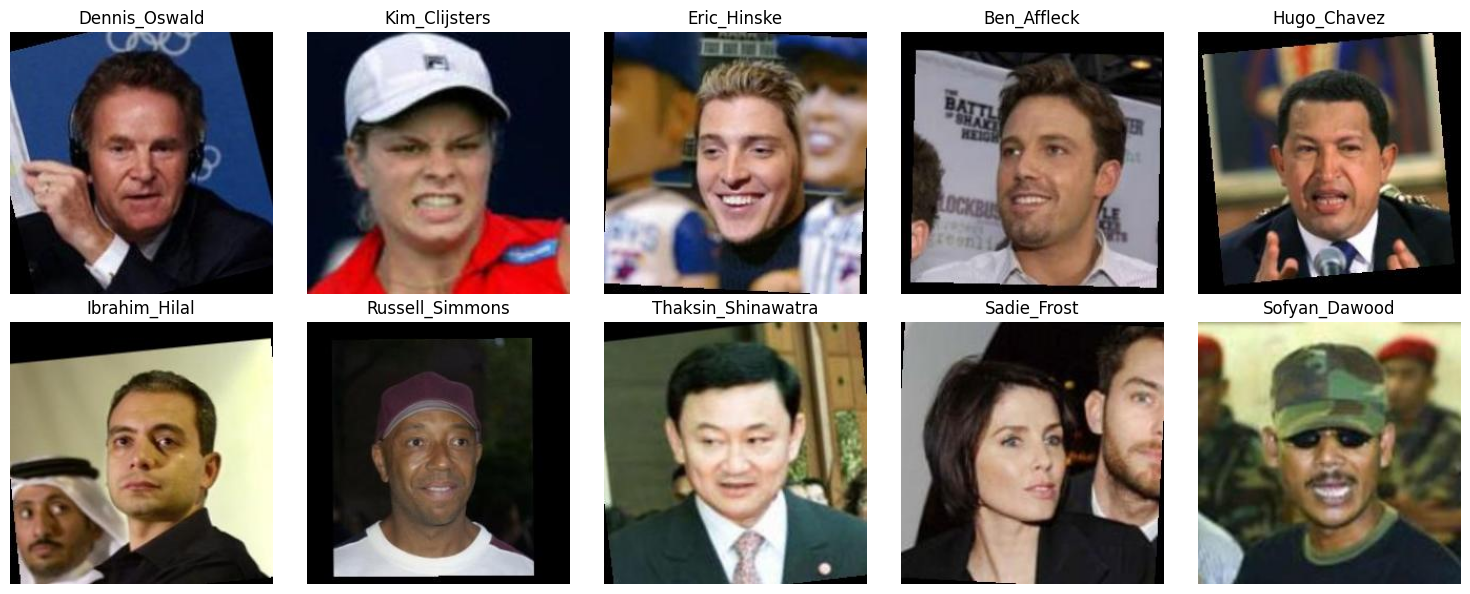

In [4]:
# visualize 10 randomly selected images from the dataset
# and their corresponding labels
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = "LFW-data\lfw-deepfunneled\lfw-deepfunneled"  # Change to your dataset path

# Gather all image paths and labels

def list_images_and_labels(dataset_path):
    image_label_list = []
    for person_name in os.listdir(dataset_path):
        person_dir = os.path.join(dataset_path, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(person_dir, img_name)
                    image_label_list.append((img_path, person_name))
    return image_label_list

# Randomly select 10 images
sampled = random.sample(list_images_and_labels(dataset_path), 10)

# Plot images with labels
plt.figure(figsize=(15, 6))
for idx, (img_path, label) in enumerate(sampled):
    img = Image.open(img_path)
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Make chrome db collection

In [2]:
from db_collections import chorma_db_get_collection

lfw = chorma_db_get_collection("lfw-face-embeddings")

Collection 'lfw-face-embeddings' loaded.


In [1]:
# populate the database with the images in LFW dataset

import os
from get_embedding import get_face_embedding

def ingest_known_faces(data, collection):
    print(f"Starting ingestion")
    known_embeddings = []
    known_metadatas = []
    known_ids = []
    image_counter = 0

    for img_path, label in data:
        try:
            # Generate the embedding for the image
            embedding = get_face_embedding(img_path)
            if embedding is not None:
                known_embeddings.append(embedding)
                known_metadatas.append({"label": label})
                known_ids.append(f"img_{image_counter}")
                image_counter += 1
            else:
                print(f"Failed to generate embedding for {img_path}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    if known_embeddings:
        print(f"Adding {len(known_embeddings)} embeddings to the collection...")
        try:
            # if the collection size is bigger than 5461, submit by batches
            if len(known_embeddings) > 5461:
                batch_size = 5461
                for i in range(0, len(known_embeddings), batch_size):
                    collection.add(
                        embeddings=known_embeddings[i:i + batch_size],
                        metadatas=known_metadatas[i:i + batch_size],
                        ids=known_ids[i:i + batch_size]
                    )
            else:
                # Add all embeddings at once
                collection.add(
                    embeddings=known_embeddings,
                    metadatas=known_metadatas,
                    ids=known_ids
                )
            print(f"Successfully added {len(known_embeddings)} embeddings to ChromaDB.")
        except Exception as e:
            print(f"Error adding embeddings to Chroma: {e}")
            # You might encounter errors if IDs are not unique or data format is wrong
    else:
        print("No embeddings were generated to add to the collection.")


e:\AISeed\Face-vectordatabase\.venv-win\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'device_id': '0', 'has_user_compute_stream': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'user_compute_stream': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'enable_cuda_graph': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'do_copy_in_default_stream': '1', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'prefer_nhwc': '0', 'use_ep_level_unified_stream': '0', 'use_tf32': '1', 'sdpa_kernel': '0', 'fuse_conv_bias': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider']

In [5]:
lfw_data = list_images_and_labels("LFW-data/lfw-deepfunneled/lfw-deepfunneled")

In [6]:
ingest_known_faces(lfw_data, collection=lfw)

Starting ingestion
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdel_Aziz_Al-Hakim\Abdel_Aziz_Al-Hakim_0001.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdel_Nasser_Assidi\Abdel_Nasser_Assidi_0001.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdel_Nasser_Assidi\Abdel_Nasser_Assidi_0002.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdulaziz_Kamilov\Abdulaziz_Kamilov_0001.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdullah_al-Attiyah\Abdullah_al-Attiyah_0002.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdullah_Gul\Abdullah_Gul_0003.jpg. Using the largest face.
Multiple faces detected in LFW-data/lfw-deepfunneled/lfw-deepfunneled\Abdullah_Gul\Abdullah_Gul_0006.jpg. Using the largest face.
Multi

In [ ]:
# check collection length
print(f"Collection length: {len(lfw)}")

TypeError: object of type 'Collection' has no len()